In [2]:
#!/bin/env/python

import pandas as pd
import networkx as nx


df = pd.read_csv('../test/roary/gene_presence_absence.csv')


In [3]:
#make the 1st column the row name
df.set_index(df.columns[0], inplace=True)

In [4]:
#check the 14th col
df.iloc[:, 13]


Gene
thrS          PBIEAMFA_00384
rplC          PBIEAMFA_00193
rpsM          PBIEAMFA_00217
rplQ          PBIEAMFA_00220
rpmA          PBIEAMFA_00428
                   ...      
group_9995               NaN
group_9996               NaN
group_9997               NaN
group_9998               NaN
group_9999               NaN
Name: gordonii_USA_FDA, Length: 14944, dtype: object

In [5]:
threshold = 0.5
NO_ISOLATES = 31
df = df[df['No. isolates'] > (threshold * NO_ISOLATES)]


In [6]:
df

,Non-unique Gene name,Annotation,No. isolates,No. sequences,Avg sequences per isolate,Genome Fragment,Order within Fragment,Accessory Fragment,Accessory Order with Fragment,QC,...,oralis_USA_Baltimore,oralis_USA_Chicago,oralis_USA_FDA,oralis_Zealand_A16000295,oralis_Zealand_CF7_Ac3-15,pneumoniae_Lebanon_AUB_475,pneumoniae_Lebanon_AUB_521,pneumoniae_Lebanon_AUB_566,sanguinis_Texas,thermophilus_France
Gene,,,,,,,,,,,,,,,,,,,,,
thrS,NaN,Threonine--tRNA ligase,31,31,1.0,30,4867,NaN,NaN,NaN,...,MKIIHIBE_01004,ICLACKFK_00729,CKAMCEFP_00392,AKDALEJM_00650,LAMCJNAC_01409,BGLEDEHL_00628,JOPHFHME_00627,ENNPKMBI_01540,LNMLLMIC_00398,GGJOBPCC_00616
rplC,NaN,50S ribosomal protein L3,31,31,1.0,30,3549,NaN,NaN,NaN,...,MKIIHIBE_01292,ICLACKFK_01019,CKAMCEFP_00993,AKDALEJM_00308,LAMCJNAC_01022,BGLEDEHL_01997,JOPHFHME_01942,ENNPKMBI_00209,LNMLLMIC_00140,GGJOBPCC_01863
rpsM,NaN,30S ribosomal protein S13,31,31,1.0,30,3512,NaN,NaN,NaN,...,MKIIHIBE_01268,ICLACKFK_00994,CKAMCEFP_01017,AKDALEJM_00332,LAMCJNAC_00997,BGLEDEHL_01973,JOPHFHME_01918,ENNPKMBI_00233,LNMLLMIC_00163,GGJOBPCC_01839
rplQ,NaN,50S ribosomal protein L17,31,31,1.0,30,3509,NaN,NaN,NaN,...,MKIIHIBE_01265,ICLACKFK_00991,CKAMCEFP_01020,AKDALEJM_00335,LAMCJNAC_00994,BGLEDEHL_01970,JOPHFHME_01915,ENNPKMBI_00236,LNMLLMIC_00166,GGJOBPCC_01836
rpmA,NaN,50S ribosomal protein L27,31,31,1.0,30,13641,NaN,NaN,NaN,...,MKIIHIBE_00774,ICLACKFK_00509,CKAMCEFP_00155,AKDALEJM_00891,LAMCJNAC_00075,BGLEDEHL_01124,JOPHFHME_01069,ENNPKMBI_01088,LNMLLMIC_00883,GGJOBPCC_00466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,NaN,hypothetical protein,16,16,1.0,30,14013,1.0,2120.0,NaN,...,MKIIHIBE_00325,ICLACKFK_00074,NaN,NaN,LAMCJNAC_01802,NaN,NaN,NaN,NaN,NaN
group_679,NaN,hypothetical protein,16,16,1.0,30,11421,1.0,13442.0,NaN,...,MKIIHIBE_01159,ICLACKFK_00890,CKAMCEFP_00553,NaN,LAMCJNAC_01267,NaN,NaN,NaN,NaN,NaN
group_775,NaN,hypothetical protein,16,16,1.0,30,9501,1.0,7680.0,NaN,...,MKIIHIBE_00206,ICLACKFK_01311,CKAMCEFP_01394,NaN,LAMCJNAC_00908,NaN,NaN,NaN,NaN,NaN


In [7]:
# removing col 1 to 14
df=df.drop(df.columns[0:13], axis=1)

In [8]:
#make the NaN 0s and the rest 1s
df = df.fillna(0)

df.where(df == 0, 1)

,gordonii_USA_FDA,mitis_USA_NYC,oralis_Canada,oralis_China,oralis_ChinaCP018338,oralis_China_SOD,oralis_Denmark,oralis_Germany_DD25,oralis_Germany_SN51445,oralis_Germany_Uo5,...,oralis_USA_Baltimore,oralis_USA_Chicago,oralis_USA_FDA,oralis_Zealand_A16000295,oralis_Zealand_CF7_Ac3-15,pneumoniae_Lebanon_AUB_475,pneumoniae_Lebanon_AUB_521,pneumoniae_Lebanon_AUB_566,sanguinis_Texas,thermophilus_France
Gene,,,,,,,,,,,,,,,,,,,,,
thrS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rplC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rpsM,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rplQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rpmA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,0,0,1,1,1,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
group_679,0,0,1,1,1,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
group_775,0,0,1,1,0,0,0,1,1,0,...,1,1,1,0,1,0,0,0,0,0


In [9]:
metadata_df = df.iloc[:, 0:13]
metadata_df

,gordonii_USA_FDA,mitis_USA_NYC,oralis_Canada,oralis_China,oralis_ChinaCP018338,oralis_China_SOD,oralis_Denmark,oralis_Germany_DD25,oralis_Germany_SN51445,oralis_Germany_Uo5,oralis_Korea,oralis_Korea_HP01,oralis_Lebanon_LAU
Gene,,,,,,,,,,,,,
thrS,PBIEAMFA_00384,LBCDGOKB_00404,ANGOOEGF_00911,IACFKHBD_00866,BAJMDCKA_00482,LFMCCKHJ_00425,NLMLKOPB_00785,PEFKPAAP_00942,LANMFOCN_00896,FGGKMPOH_01456,OOKGLKIK_01172,JGEGMBEE_01525,CGKMLFJB_01138
rplC,PBIEAMFA_00193,LBCDGOKB_01537,ANGOOEGF_01175,IACFKHBD_01663,BAJMDCKA_00194,LFMCCKHJ_01766,NLMLKOPB_01228,PEFKPAAP_01330,LANMFOCN_00582,FGGKMPOH_01732,OOKGLKIK_01800,JGEGMBEE_01783,CGKMLFJB_00890
rpsM,PBIEAMFA_00217,LBCDGOKB_01513,ANGOOEGF_01151,IACFKHBD_01688,BAJMDCKA_00219,LFMCCKHJ_01742,NLMLKOPB_01204,PEFKPAAP_01306,LANMFOCN_00607,FGGKMPOH_01708,OOKGLKIK_01824,JGEGMBEE_01759,CGKMLFJB_00915
rplQ,PBIEAMFA_00220,LBCDGOKB_01510,ANGOOEGF_01148,IACFKHBD_01691,BAJMDCKA_00222,LFMCCKHJ_01739,NLMLKOPB_01201,PEFKPAAP_01303,LANMFOCN_00610,FGGKMPOH_01705,OOKGLKIK_01827,JGEGMBEE_01756,CGKMLFJB_00918
rpmA,PBIEAMFA_00428,LBCDGOKB_00629,ANGOOEGF_00076,IACFKHBD_00075,BAJMDCKA_01186,LFMCCKHJ_01263,NLMLKOPB_01588,PEFKPAAP_00723,LANMFOCN_01182,FGGKMPOH_01205,OOKGLKIK_00939,JGEGMBEE_01281,CGKMLFJB_00170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,0,0,ANGOOEGF_00441,IACFKHBD_01801,BAJMDCKA_00672,LFMCCKHJ_00719,0,0,LANMFOCN_01639,0,0,JGEGMBEE_00787,CGKMLFJB_00635
group_679,0,0,ANGOOEGF_01061,IACFKHBD_00724,BAJMDCKA_00327,0,0,0,LANMFOCN_00745,0,OOKGLKIK_01338,0,0
group_775,0,0,ANGOOEGF_00567,IACFKHBD_01269,0,0,0,PEFKPAAP_00539,LANMFOCN_01768,0,OOKGLKIK_00340,0,0


In [16]:
#!/bin/env/python

import pandas as pd
import networkx as nx
from typing import Tuple
import os

def read_df(file_path: str) -> pd.DataFrame:
    '''this function reads a csv file and returns a dataframe
    input:
        - file_path: (str) path to the csv file
    output:
        - df: (pd.DataFrame) dataframe read from the csv file
    '''

    if not os.path.exists(file_path):
        print(f'file {file_path} does not exist')
        return None
    df = pd.read_csv(file_path)
    return df

def collect_data(df: pd.DataFrame, sample_col: int=13, threshold: float = 0) -> Tuple[pd.DataFrame, pd.DataFrame]:
    '''this function takes a raw dataframe and returns only the genes as rows and samples as columns in a binary matrix
    - saves all the info in a seperate metadata dataframe
    - removes all the genes that are not present in mroe than a threshhold percentage of samples
    - returns the binary matrix and the metadata dataframe

    input:
        - df: (pd.DataFrame) raw dataframe read from csv
        - sample_col: (int) the col number whre samples start
        - threshold: (float) the percentage of samples a gene needs to be present in to be kept
    output:
        - df: (pd.DataFrame) binary matrix of genes and samples
        - metadata_df: (pd.DataFrame) metadata dataframe with all the info from the raw dataframe
    
    '''
    df.set_index(df.columns[0], inplace=True)
    SAMPLE_NO = df.shape[1] - sample_col

    df = df[df['No. isolates'] > (threshold * SAMPLE_NO)]

    metadata_df = df.iloc[:, 0:sample_col]
    df=df.drop(df.columns[0:sample_col], axis=1)
    df = df.fillna(0)
    df=df.where(df == 0, 1)

    return df, metadata_df


    
    


test_df=read_df('../test/roary/gene_presence_absence.csv')
test_df, test_metadata_df = collect_data(test_df, threshold=0.5)
test_df

,gordonii_USA_FDA,mitis_USA_NYC,oralis_Canada,oralis_China,oralis_ChinaCP018338,oralis_China_SOD,oralis_Denmark,oralis_Germany_DD25,oralis_Germany_SN51445,oralis_Germany_Uo5,...,oralis_USA_Baltimore,oralis_USA_Chicago,oralis_USA_FDA,oralis_Zealand_A16000295,oralis_Zealand_CF7_Ac3-15,pneumoniae_Lebanon_AUB_475,pneumoniae_Lebanon_AUB_521,pneumoniae_Lebanon_AUB_566,sanguinis_Texas,thermophilus_France
Gene,,,,,,,,,,,,,,,,,,,,,
thrS,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rplC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rpsM,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rplQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
rpmA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,0,0,1,1,1,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
group_679,0,0,1,1,1,0,0,0,1,0,...,1,1,1,0,1,0,0,0,0,0
group_775,0,0,1,1,0,0,0,1,1,0,...,1,1,1,0,1,0,0,0,0,0


In [17]:
df= test_df
adj_matrix = df.dot(df.T)

In [18]:
adj_matrix.index

Index(['thrS', 'rplC', 'rpsM', 'rplQ', 'rpmA', 'rpsI', 'rpsL', 'rpmH', 'rpmF',
       'rpsJ',
       ...
       'group_575', 'group_5776', 'smc_2', 'aaaT', 'group_660', 'group_664',
       'group_679', 'group_775', 'group_796', 'group_999'],
      dtype='object', name='Gene', length=1354)

In [19]:
import networkx as nx
#make a [][] matrix out of adj_matrix
# adj_matrix = adj_matrix.values
adj_matrix

Gene,thrS,rplC,rpsM,rplQ,rpmA,rpsI,rpsL,rpmH,rpmF,rpsJ,...,group_575,group_5776,smc_2,aaaT,group_660,group_664,group_679,group_775,group_796,group_999
Gene,,,,,,,,,,,,,,,,,,,,,
thrS,31,31,31,31,31,31,31,31,31,31,...,16,16,16,16,16,16,16,16,16,16
rplC,31,31,31,31,31,31,31,31,31,31,...,16,16,16,16,16,16,16,16,16,16
rpsM,31,31,31,31,31,31,31,31,31,31,...,16,16,16,16,16,16,16,16,16,16
rplQ,31,31,31,31,31,31,31,31,31,31,...,16,16,16,16,16,16,16,16,16,16
rpmA,31,31,31,31,31,31,31,31,31,31,...,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,16,16,16,16,16,16,16,16,16,16,...,11,10,10,9,10,16,12,12,12,12
group_679,16,16,16,16,16,16,16,16,16,16,...,14,14,11,11,13,12,16,14,11,13
group_775,16,16,16,16,16,16,16,16,16,16,...,14,14,12,11,13,12,14,16,10,13


In [20]:
#make dataype int
adj_matrix = adj_matrix.astype(int)
#cretae a graph out of it
G = nx.from_pandas_adjacency(adj_matrix)
G.remove_edges_from(nx.selfloop_edges(G))

ModuleNotFoundError: No module named 'scipy'

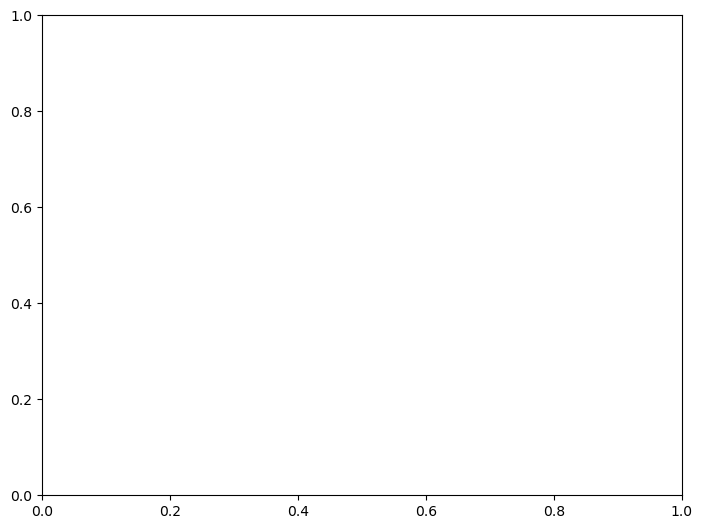

In [22]:
#visualize G
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

In [14]:
# graph = nx.from_pandas_adjacency(adj_matrix)
graph.remove_edges_from(nx.selfloop_edges(graph))

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [17]:
df.index

Index(['thrS', 'rplC', 'rpsM', 'rplQ', 'rpmA', 'rpsI', 'rpsL', 'rpmH', 'rpmF',
       'rpsJ',
       ...
       'group_575', 'group_5776', 'smc_2', 'aaaT', 'group_660', 'group_664',
       'group_679', 'group_775', 'group_796', 'group_999'],
      dtype='object', name='Gene', length=1354)

In [23]:
#show G as an adjacency matrix
nx.to_pandas_adjacency(G)


,thrS,rplC,rpsM,rplQ,rpmA,rpsI,rpsL,rpmH,rpmF,rpsJ,...,group_575,group_5776,smc_2,aaaT,group_660,group_664,group_679,group_775,group_796,group_999
thrS,0.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
rplC,31.0,0.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
rpsM,31.0,31.0,0.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
rplQ,31.0,31.0,31.0,0.0,31.0,31.0,31.0,31.0,31.0,31.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
rpmA,31.0,31.0,31.0,31.0,0.0,31.0,31.0,31.0,31.0,31.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_664,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,11.0,10.0,10.0,9.0,10.0,0.0,12.0,12.0,12.0,12.0
group_679,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,14.0,14.0,11.0,11.0,13.0,12.0,0.0,14.0,11.0,13.0
group_775,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,14.0,14.0,12.0,11.0,13.0,12.0,14.0,0.0,10.0,13.0
group_796,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,11.0,11.0,9.0,8.0,10.0,12.0,11.0,10.0,0.0,9.0


In [24]:
import os
os.getcwd()

'/home/rayane/capstone-project/src'

In [25]:
create_gml = lambda G, file_path: nx.write_gml(G, file_path)
create_gml(G, '../data/graphs/1.1_gene-gene_presence_0.5_strepto_31.gml') 

In [29]:
np.mean(list(dict(G.degree(weight='weight')).values()))
# np.mean(list(dict(G.degree()).values()))

30148.437223042834

In [30]:
import numpy as np
import networkx as nx
   
def compute_network_stats(G, network_name):
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_subgraph = G.subgraph(largest_cc)
    stats = {
        "Network": network_name,
        "|N|": G.number_of_nodes(),
        "|V|": G.number_of_edges(),
        "Density": nx.density(G),
        "<k>": np.mean(list(dict(G.degree()).values())),
        "<k> weighted": np.mean(list(dict(G.degree(weight='weight')).values())),
        "<cc>": nx.average_clustering(G),
        "<spath>": nx.average_shortest_path_length(largest_cc_subgraph),
        "d": nx.diameter(largest_cc_subgraph)
    }
    
    return stats

gene_presence_50 = compute_network_stats(G, 'gene presence network')

{'Network': 'gene presence network',
 '|N|': 1354,
 '|V|': 915981,
 'Density': 1.0,
 '<k>': 1353.0,
 '<k> weighted': 30148.437223042834,
 '<cc>': 1.0,
 '<spath>': 1.0,
 'd': 1}

In [32]:
G=nx.read_gml('../data/graphs/1.1_gene-gene_presence_0.5_strepto_31.gml')
g=nx.read_gml('../data/graphs/1.1_test.gml')
g==G

False

In [33]:
test=compute_network_stats(g, 'test')

In [34]:
test

{'Network': 'test',
 '|N|': 1354,
 '|V|': 915981,
 'Density': 1.0,
 '<k>': 1353.0,
 '<k> weighted': 30148.437223042834,
 '<cc>': 1.0,
 '<spath>': 1.0,
 'd': 1}